In [1]:
import pandas as pd
import os
import sys

from IPython.display import HTML, IFrame

sys.path.append(os.path.dirname(os.path.realpath("/nfs/nhome/live/aoomerjee/MSc-Thesis/hct")))
sys.path.append(os.path.dirname(os.path.realpath("/nfs/nhome/live/aoomerjee/MSc-Thesis/")))

from testing import testrun, plot, display

from hct.io.model import save, load
import matplotlib.pyplot as plt

from hct.training.hyperparam_sweeps.low_level_env_mlp_v2.run import generate_data_tables, hyperparameter_sweep



2023-08-11 02:48:07.051758: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
from hct.training.hyperparam_sweeps.low_level_env_mlp_v2.run import generate_data_tables, hyperparameter_sweep
h=hyperparameter_sweep()[0]
for i in h:
    print(i)

{'position_goals': True, 'velocity_goals': False, 'distance_reward': 'absolute', 'architecture_configs': {'policy_hidden_layer_sizes': (32, 32, 32, 32), 'value_hidden_layer_sizes': (256, 256, 256, 256, 256)}}
{'position_goals': True, 'velocity_goals': False, 'distance_reward': 'absolute', 'architecture_configs': {'policy_hidden_layer_sizes': (64, 64, 64, 64), 'value_hidden_layer_sizes': (512, 512, 512, 512, 512)}}
{'position_goals': True, 'velocity_goals': False, 'distance_reward': 'absolute', 'architecture_configs': {'policy_hidden_layer_sizes': (128, 128, 128, 128), 'value_hidden_layer_sizes': (1024, 1024, 1024, 1024, 1024)}}
{'position_goals': True, 'velocity_goals': False, 'distance_reward': 'relative', 'architecture_configs': {'policy_hidden_layer_sizes': (32, 32, 32, 32), 'value_hidden_layer_sizes': (256, 256, 256, 256, 256)}}
{'position_goals': True, 'velocity_goals': False, 'distance_reward': 'relative', 'architecture_configs': {'policy_hidden_layer_sizes': (64, 64, 64, 64), 'v

In [3]:
data = generate_data_tables()

data = pd.read_csv("/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/low_level_experimental_results.csv")
print(len(data))

12


## We start by setting positional goals, and trialling various hyperparameters for reward structures. These include:
    Distance reward type: [absolute, relative]
    Goal reached reward: [0, 50, 100]
    Unhealthy cost: [0, -1]

Looking at the top performers, we find that whilst variant 5 saw the lowest goal distances, agents on average took longer to reach the goal. Variant 4 on the other hand saw higher mean goal distances, but tighter variance and shorter episodes, as well as a low unhealthy score. We compare training plots for variants 4, 5 and 8, as variant 8 showed the lowest average episode length, indicating that on average it achieved goals faster


In [4]:
pos_goals_low_air = data[(data.velocity_goals.isnull())].sort_values("eval/episode_goal_distance_world_frame")
min_values = pos_goals_low_air[["eval/episode_goal_distance_world_frame", 'eval/avg_episode_length']].min()

mask = (pos_goals_low_air[["eval/episode_goal_distance_world_frame", 'eval/avg_episode_length']] == min_values).any(axis=1)
best_pos_goals = pos_goals_low_air[mask]

best_pos_goals = pos_goals_low_air.loc[[5, 4, 8]]
pos_goals_low_air.head(12)


#best_pos_goals = pos_goals['Model Variant ID'][:5]
#pos_goals.head(25)

KeyError: '[8] not in index'

In [ ]:
best_pos_goals.head(15)

Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
5                 5            True            NaN                    0   
4                 4            True            NaN                    0   
8                 8            True            NaN                   50   

   unhealthy_cost distance_reward  eval/walltime   training/sps  \
5              -1        relative     709.446594  103416.246435   
4              -1        absolute     775.258768  160287.499115   
8               0        absolute     781.882860  159851.138043   

   training/walltime  training/entropy_loss  ...  training/v_loss  \
5        3334.561848               0.000276  ...         1.978086   
4        2152.765200               0.018956  ...      2059.653300   
8        2160.083449               0.025427  ...      2551.657700   

   eval/episode_goal_distance_relative_frame_normalised  \
5                                    0.0181 ± 0.0163      
4                                    0.0186 ± 0.0155      
8                                    0.0254 ± 0.0436      

   eval/episode_goal_distance_root_normalised  \
5                             0.0141 ± 0.0167   
4                             0.0160 ± 0.0155   
8                             0.0234 ± 0.0438   

  eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
5                        1.5762 ± 1.7543           0.0078 ± 0.0880   
4                        1.9832 ± 1.5708           0.0469 ± 0.2114   
8                        2.7155 ± 3.5605           0.0781 ± 0.2684   

      eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
5       15.2454 ± 18.1207     430.9141 ± 375.3100             4.522062   
4  -3560.1560 ± 4686.8491     361.6172 ± 415.8654             5.050706   
8  -3805.4902 ± 6689.3452     296.8594 ± 390.1043             5.088656   

       eval/sps  goal_root_pos_masked  
5  28305.673763                   NaN  
4  25342.993302                   NaN  
8  25153.988655                   NaN  

[3 rows x 22 columns]

In [ ]:
testruns = {}
for i, model in enumerate(best_pos_goals['Model Variant ID']):
    modelpath = f"/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/runs/{model}"
    testruns[model] = testrun(modelpath)

savepath = "/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/pos_testruns"
save("/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/pos_testruns", testruns)


/nfs/nhome/live/aoomerjee/mambaforge/envs/msc-thesis-hpc/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:2396: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  start = asarray(start, dtype=computation_dtype)
/nfs/nhome/live/aoomerjee/mambaforge/envs/msc-thesis-hpc/lib/python3.11/site-packages/jax/_src/numpy/lax_numpy.py:2397: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  stop = asarray(stop, dtype=computation_dtype)
/nfs/nhome/live/aoomerjee/mambaforge/envs/msc-thesis-h

We plot training curves to observe sample efficiency, and testing curves to understand the agent's behavious over the course of an episode.

Variant 5 shows greater sample efficiency during training, but ultimately performs poorer over the course of an invividual episode, where variants 4 and 8 show similar levels of performance with both reaching goals more quickly than variant 5. We choose to progress with further experiments using variant 4, as this shows greater sample efficiency than variant 8 during training and similar performance levels during testing

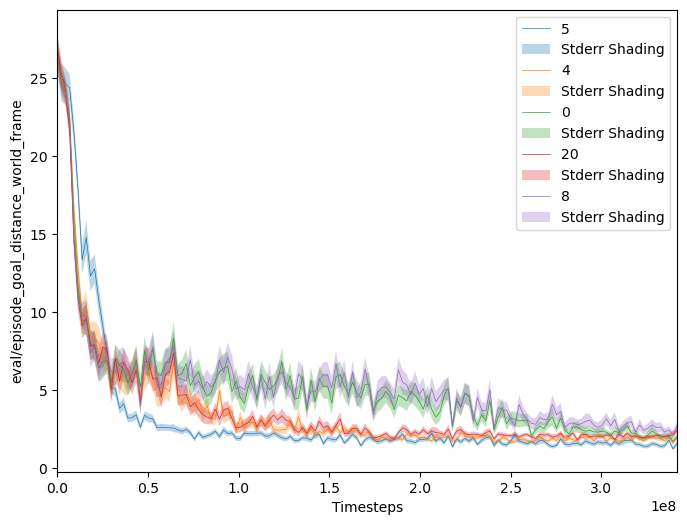

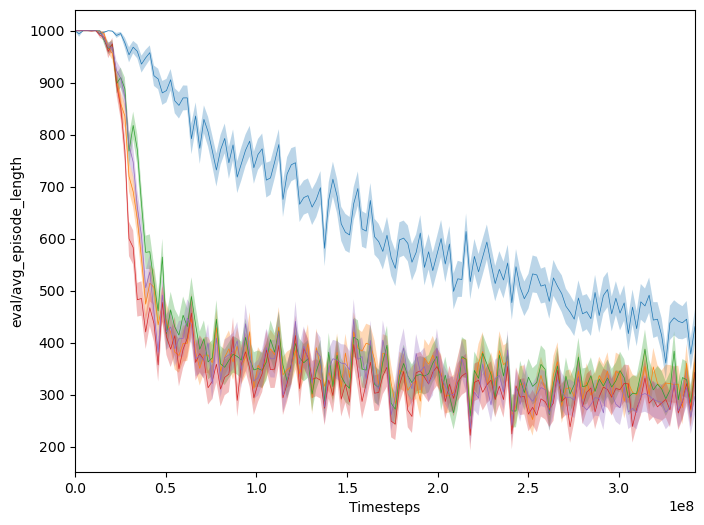

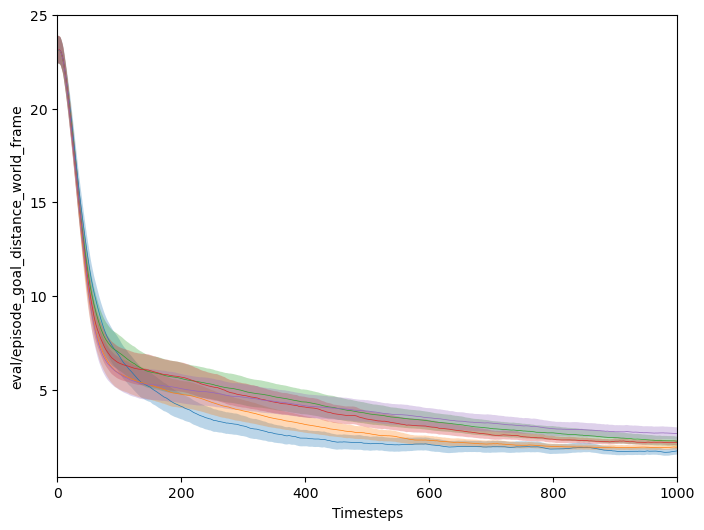

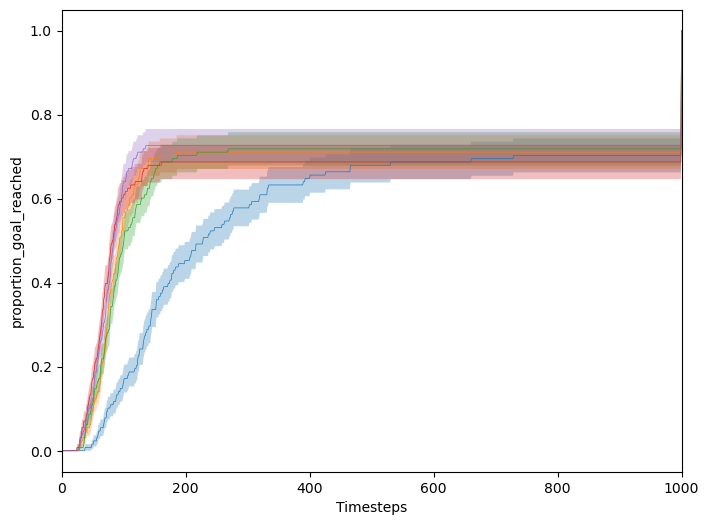

In [ ]:
from hct.io.model import save, load
import matplotlib.pyplot as plt
savepath = "/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/pos_testruns"
testruns = load(savepath)


plt.figure(figsize=(8, 6))
for k, (i, t) in enumerate(testruns.items()):
    plot(t, 'eval/episode_goal_distance_world_frame', timeframe='training', error='stderr')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for k, (i, t) in enumerate(testruns.items()):
    plot(t, 'eval/avg_episode_length', timeframe='training', error='stderr')
plt.show()

plt.figure(figsize=(8, 6))
for k, (i, t) in enumerate(testruns.items()):
    plot(t, 'eval/episode_goal_distance_world_frame', timeframe='testing', error='stderr')
plt.show()

plt.figure(figsize=(8, 6))
for k, (i, t) in enumerate(testruns.items()):
    plot(t, 'proportion_goal_reached', timeframe='testing', error='stderr')
plt.show()



In [ ]:
finalised_pos_goals = data[data['Model Variant ID']==4]
testruns = {}
for i, model in enumerate(finalised_pos_goals['Model Variant ID']):
    modelpath = f"/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/runs/{model}"
    testruns[model] = testrun(modelpath)

savepath = "/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/finalised_pos_testruns"
save("/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/finalised_pos_testruns", testruns)

## Using the hyperparameters for rewards from variant 4, we experiment further with different goal formulations and different network architectures.

We retrain variant 4 with a larger network to see if the sample efficiency and performance improves. Additionally, using these same hyperparameters, we train variants with more complex goal conditioning: a model condtioned on positional goals for the full agent and velocity goals for the root node, one conditioned on positional and velocity goals for all links, and one conditioned on velocity goals only for all links. Each of these variants are trialled with both the small and large network parameterisation

For the positional goal variant, we see much greater sample efficiency for the larger network, which is able to get much closer to goals on average in shorter time period. In contrast, there is little difference between variants for the other goal types, with full velocity goals failing to achieve any level of reasonable performance. On inspection of rollouts, it appears that the root goal variants prioritise the positional goal, but fail to achieve both the positional and root velocity goal simultaneously. Given this poor performance on the velocity goal front, we progress only with positional goals for the next level of the hierarchy using the more complex network. We train this variant further to a full total of 1 billion timesteps to ensure that it performs as optimally as possible for processing goals from the upper levels of the network

In [ ]:
second_run_data = data[(data.air_probability==0.1) & (data['reward_goal_reached']==0) & (data['unhealthy_cost']==-1) & (data['distance_reward']=='absolute') & (data['goal_root_pos_masked'].isnull())].sort_values("eval/episode_goal_distance_world_frame").drop('air_probability', axis = 1)
second_run_data.head(50)


Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
114               120            True            NaN                    0   
4                   4            True            NaN                    0   
115               121            True           root                    0   
28                 28            True           root                    0   
117               123           False           full                    0   
76                 76           False           full                    0   
52                 52            True           full                    0   
116               122            True           full                    0   

     unhealthy_cost distance_reward  eval/walltime   training/sps  \
114              -1        absolute     781.020546   72158.183203   
4                -1        absolute     775.258768  160287.499115   
115              -1        absolute     785.148996  131103.420030   
28               -1        absolute     874.667119  256408.235654   
117              -1        absolute     773.455789  134630.362172   
76               -1        absolute     779.957227  160321.670014   
52               -1        absolute     773.729487  158078.362250   
116              -1        absolute     774.723747  132146.838813   

     training/walltime  training/entropy_loss  ...  training/v_loss  \
114        4762.487180               0.022382  ...        1487.1587   
4          2152.765200               0.018956  ...        2059.6533   
115        2626.967153              -0.001462  ...        1060.2212   
28         1348.748749               0.010737  ...        1255.7643   
117        2557.103010               0.033880  ...        2047.7115   
76         2150.000952               0.048893  ...        1553.6075   
52         2185.696179               0.027833  ...        2592.7695   
116        2613.822871               0.041027  ...        1457.9194   

     eval/episode_goal_distance_relative_frame_normalised  \
114                                    0.0153 ± 0.0127      
4                                      0.0186 ± 0.0155      
115                                    0.2250 ± 0.0546      
28                                     0.2241 ± 0.0555      
117                                    0.2938 ± 0.0459      
76                                     0.2979 ± 0.0435      
52                                     0.3025 ± 0.0426      
116                                    0.3082 ± 0.0441      

     eval/episode_goal_distance_root_normalised  \
114                             0.0129 ± 0.0125   
4                               0.0160 ± 0.0155   
115                             0.2247 ± 0.0547   
28                              0.2239 ± 0.0556   
117                             0.2378 ± 0.0660   
76                              0.2546 ± 0.0659   
52                              0.3058 ± 0.0819   
116                             0.3286 ± 0.0916   

    eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
114                        1.7618 ± 1.2878           0.0625 ± 0.2421   
4                          1.9832 ± 1.5708           0.0469 ± 0.2114   
115                       11.5172 ± 2.6537           0.0547 ± 0.2274   
28                        11.7697 ± 2.9500           0.0469 ± 0.2114   
117                       41.5878 ± 7.6512           0.1328 ± 0.3394   
76                        43.1472 ± 7.5695           0.2734 ± 0.4457   
52                       54.0291 ± 11.0235           0.2344 ± 0.4236   
116                      56.7119 ± 12.7695           0.2188 ± 0.4134   

         eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
114   -2305.9844 ± 3261.7842     261.0312 ± 374.0307             5.106953   
4     -3560.1560 ± 4686.8491     361.6172 ± 415.8654             5.050706   
115  -13272.0889 ± 3176.2600      1000.0000 ± 0.0000             5.131022   
28   -14087.2676 ± 4326.5098      1000.0000 ± 0.0000             5.729139   
117  

36    36
45    45
29    29
Name: Model Variant ID, dtype: int64


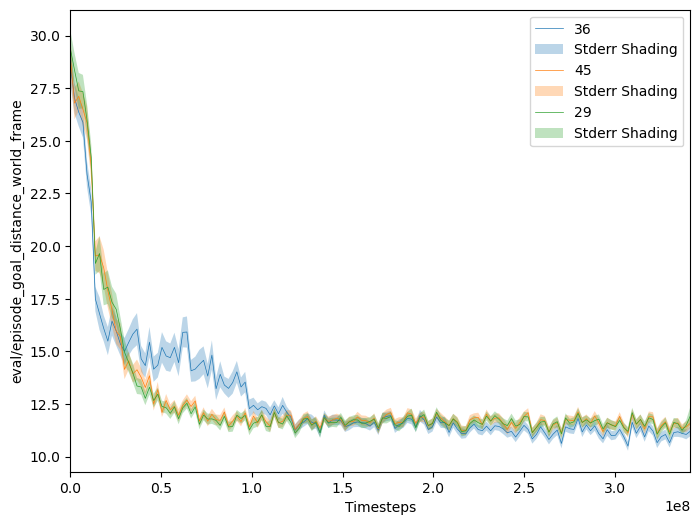

<!DOCTYPE html>
<html>

  <head>
    <title>Brax visualizer</title>
    <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">
  </head>

  <style>
    body {
      margin: 0;
      padding: 0;
    }

    #brax-viewer {
      height: 480px;
      margin: 0;
      padding: 0;
    }
  </style>
  <script async src="https://unpkg.com/es-module-shims@1.6.3/dist/es-module-shims.js"></script>

  <script type="importmap">
    {
      "imports": {
        "three": "https://unpkg.com/three@0.150.1/build/three.module.js",
        "three/addons/": "https://unpkg.com/three@0.150.1/examples/jsm/",
        "lilgui": "https://cdn.jsdelivr.net/npm/lil-gui@0.18.0/+esm",
        "viewer": "https://cdn.jsdelivr.net/gh/google/brax@v0.9.1/brax/visualizer/js/viewer.js"
      }
    }
  </script>

  <script type="application/javascript">
  var system = {"dt": 0.05, "gravity": [0.0, 0.0, -9.8100004196167], "viscosity": 0.0, "density": 0.0, "link": {"transform": {"pos": [[0.0, 0.0, 0.0], [0.400000005

In [ ]:

testruns = {}
for i, model in enumerate(second_run_data['Model Variant ID']):
    modelpath = f"/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/runs/{model}"
    testruns[model] = testrun(modelpath)

savepath = "/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/second_run_data"
save("/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/testruns/second_run_data", testruns)


plt.figure(figsize=(8, 6))
for k, (i, t) in enumerate(testruns.items()):
    plot(t, 'eval/episode_goal_distance_world_frame', timeframe='training', error='stderr')
plt.legend()
plt.show()

for i, t in testruns.items():
    print(display(t, 0)) 


In [ ]:
modelpath = f"/nfs/nhome/live/aoomerjee/MSc-Thesis/hct/training/hyperparam_sweeps/low_level_env_mlp/runs/final_low_level"
for i in range(1):
    testruns= testrun(modelpath, num_eval_envs = 8092)
    print(testruns['final_metrics'])

{'eval/walltime': 77.26217436790466, 'eval/episode_goal_distance_relative_frame_normalised': {'mean': 0.014610273763537407, 'std': 0.012358754873275757, 'stderr': Array(0.00109237, dtype=float32, weak_type=True)}, 'eval/episode_goal_distance_root_normalised': {'mean': 0.012338095344603062, 'std': 0.011956078931689262, 'stderr': Array(0.00105678, dtype=float32, weak_type=True)}, 'eval/episode_goal_distance_world_frame': {'mean': 1.7698431015014648, 'std': 1.2155410051345825, 'stderr': Array(0.10743966, dtype=float32, weak_type=True)}, 'eval/episode_is_unhealthy': {'mean': 0.015625, 'std': 0.12401959300041199, 'stderr': Array(0.01096189, dtype=float32, weak_type=True)}, 'eval/episode_reward': {'mean': -1949.7470703125, 'std': 2934.062744140625, 'stderr': Array(259.33698, dtype=float32, weak_type=True)}, 'eval/avg_episode_length': {'mean': 242.6484375, 'std': 372.24761962890625, 'stderr': Array(32.90235, dtype=float32, weak_type=True)}, 'eval/epoch_eval_time': 77.26217436790466, 'eval/sps

KeyboardInterrupt: 

In [ ]:
print(testruns['final_metrics'])

{'eval/walltime': 77.04124736785889, 'eval/episode_goal_distance_relative_frame_normalised': {'mean': 0.015209119766950607, 'std': 0.012233017943799496, 'stderr': Array(0.00108126, dtype=float32, weak_type=True)}, 'eval/episode_goal_distance_root_normalised': {'mean': 0.012807566672563553, 'std': 0.011454494670033455, 'stderr': Array(0.00101244, dtype=float32, weak_type=True)}, 'eval/episode_goal_distance_world_frame': {'mean': 1.7569211721420288, 'std': 1.170244574546814, 'stderr': Array(0.10343599, dtype=float32, weak_type=True)}, 'eval/episode_is_unhealthy': {'mean': 0.015625, 'std': 0.12401959300041199, 'stderr': Array(0.01096189, dtype=float32, weak_type=True)}, 'eval/episode_reward': {'mean': -2026.446533203125, 'std': 2606.120849609375, 'stderr': Array(230.35072, dtype=float32, weak_type=True)}, 'eval/avg_episode_length': {'mean': 269.8359375, 'std': 387.0982666015625, 'stderr': Array(34.214977, dtype=float32, weak_type=True)}, 'eval/epoch_eval_time': 77.04124736785889, 'eval/sp

In [ ]:
for i, t in testruns.items():
    print(display(t, 4)) 

root_vel_goals.head()

<!DOCTYPE html>
<html>

  <head>
    <title>Brax visualizer</title>
    <link rel="shortcut icon" type="image/x-icon" href="/favicon.ico">
  </head>

  <style>
    body {
      margin: 0;
      padding: 0;
    }

    #brax-viewer {
      height: 480px;
      margin: 0;
      padding: 0;
    }
  </style>
  <script async src="https://unpkg.com/es-module-shims@1.6.3/dist/es-module-shims.js"></script>

  <script type="importmap">
    {
      "imports": {
        "three": "https://unpkg.com/three@0.150.1/build/three.module.js",
        "three/addons/": "https://unpkg.com/three@0.150.1/examples/jsm/",
        "lilgui": "https://cdn.jsdelivr.net/npm/lil-gui@0.18.0/+esm",
        "viewer": "https://cdn.jsdelivr.net/gh/google/brax@v0.9.1/brax/visualizer/js/viewer.js"
      }
    }
  </script>

  <script type="application/javascript">
  var system = {"dt": 0.05, "gravity": [0.0, 0.0, -9.8100004196167], "viscosity": 0.0, "density": 0.0, "link": {"transform": {"pos": [[0.0, 0.0, 0.0], [0.400000005

Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
36                36            True           root                   50   
45                45            True           root                  100   
29                29            True           root                    0   

    unhealthy_cost  air_probability distance_reward  eval/walltime  \
36              -1              0.1        absolute     845.099527   
45              -1              0.1        relative     681.224573   
29              -1              0.1        relative     781.347657   

     training/sps  training/walltime  ...  training/v_loss  \
36  262950.164432        1312.733274  ...       410.618300   
45  102966.907994        3350.085217  ...         0.850863   
29  156492.345948        2201.169426  ...         0.897460   

    eval/episode_goal_distance_relative_frame_normalised  \
36                                    0.2223 ± 0.0544      
45                                    0.2282 ± 0.0554      
29                                    0.2308 ± 0.0597      

    eval/episode_goal_distance_root_normalised  \
36                             0.2220 ± 0.0545   
45                             0.2279 ± 0.0555   
29                             0.2305 ± 0.0598   

    eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
36                        11.2098 ± 2.6766           0.0625 ± 0.2421   
45                        11.5885 ± 2.6683           0.0000 ± 0.0000   
29                        11.9447 ± 4.8549           0.0000 ± 0.0000   

        eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
36  -13662.1064 ± 3831.6462      1000.0000 ± 0.0000             5.526836   
45         8.9411 ± 12.6112      1000.0000 ± 0.0000             4.337942   
29        10.1552 ± 12.5288      1000.0000 ± 0.0000             5.077961   

        eval/sps goal_root_pos_masked  
36  23159.726001                  NaN  
45  29507.078785                  NaN  
29  25206.969257                  NaN  

[3 rows x 23 columns]

In [ ]:
root_vel_goals.head()

Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
35                35            True           root                   50   
33                33            True           root                   50   
44                44            True           root                  100   

    unhealthy_cost  air_probability distance_reward  eval/walltime  \
35               0              0.3        relative     872.824915   
33               0              0.1        relative     790.866030   
44              -1              0.1        absolute     875.006452   

     training/sps  training/walltime  ...  training/v_loss  \
35  255769.431201        1350.274729  ...         0.481513   
33  155729.468540        2218.525739  ...         0.452461   
44  255528.575061        1354.191311  ...       931.631350   

    eval/episode_goal_distance_relative_frame_normalised  \
35                                    0.2160 ± 0.0531      
33                                    0.2204 ± 0.0548      
44                                    0.2204 ± 0.0550      

    eval/episode_goal_distance_root_normalised  \
35                             0.2158 ± 0.0532   
33                             0.2201 ± 0.0550   
44                             0.2201 ± 0.0551   

    eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
35                        11.1803 ± 2.6317           0.2031 ± 0.4023   
33                        11.2912 ± 2.7594           0.3125 ± 0.4635   
44                        11.4358 ± 2.6851           0.0703 ± 0.2557   

        eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
35         15.2645 ± 7.2180      1000.0000 ± 0.0000             5.688493   
33         15.1368 ± 7.1773      1000.0000 ± 0.0000             5.139933   
44  -13876.6201 ± 4426.8438      1000.0000 ± 0.0000             5.710952   

        eval/sps goal_root_pos_masked  
35  22501.564884                  NaN  
33  24903.047818                  NaN  
44  22413.077489                  NaN  

[3 rows x 23 columns]

In [ ]:
full_vel_goals = data[(data.velocity_goals=='full') & (data.position_goals==False)].sort_values("eval/episode_goal_distance_relative_frame_normalised").head(50)
full_vel_goals.head()

Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
79                79           False           full                    0   
72                72           False           full                    0   
75                75           False           full                    0   
89                95           False           full                  100   
74                74           False           full                    0   

    unhealthy_cost  air_probability distance_reward  eval/walltime  \
79              -1              0.3        relative     716.889858   
72               0              0.1        absolute     784.904082   
75               0              0.3        relative     783.325792   
89              -1              0.3        relative     789.042321   
74               0              0.3        absolute     780.995523   

     training/sps  training/walltime  ...  training/v_loss  \
79  104860.890389        3275.686206  ...         7.563749   
72  159826.629830        2158.533452  ...      1932.732800   
75  159745.346349        2155.880545  ...         5.343639   
89  159041.951139        2162.978646  ...         6.709215   
74  160139.106479        2151.181916  ...      1775.303100   

    eval/episode_goal_distance_relative_frame_normalised  \
79                                    0.2924 ± 0.0463      
72                                    0.2942 ± 0.0429      
75                                    0.2957 ± 0.0466      
89                                    0.2958 ± 0.0447      
74                                    0.2966 ± 0.0472      

    eval/episode_goal_distance_root_normalised  \
79                             0.2387 ± 0.0648   
72                             0.2504 ± 0.0653   
75                             0.2422 ± 0.0677   
89                             0.2440 ± 0.0672   
74                             0.2459 ± 0.0675   

    eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
79                        41.9447 ± 7.6912           0.0078 ± 0.0880   
72                        42.5056 ± 7.6045           0.2344 ± 0.4236   
75                        42.0794 ± 7.7106           0.2188 ± 0.4134   
89                        42.1838 ± 7.9509           0.0234 ± 0.1513   
74                        42.6844 ± 8.0850           0.3047 ± 0.4603   

        eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
79        -6.1203 ± 19.7777      1000.0000 ± 0.0000             4.567954   
72  -42785.4961 ± 7727.4072      1000.0000 ± 0.0000             5.109089   
75          2.7528 ± 3.2350      1000.0000 ± 0.0000             5.098550   
89        -8.3750 ± 22.0718      1000.0000 ± 0.0000             5.139638   
74  -42754.0859 ± 7636.2681      1000.0000 ± 0.0000             5.079489   

        eval/sps goal_root_pos_masked  
79  28021.300474                  NaN  
72  25053.391815                  NaN  
75  25105.176562                  NaN  
89  24904.477965                  NaN  
74  25199.385250                  NaN  

[5 rows x 23 columns]

In [ ]:
full_goals = data[(data.velocity_goals=='full') & (data.position_goals==True)].sort_values("eval/episode_goal_distance_relative_frame_normalised").head(50)
full_goals.head()

Model Variant ID  position_goals velocity_goals  reward_goal_reached  \
67                67            True           full                  100   
69                69            True           full                  100   
63                63            True           full                   50   
65                65            True           full                  100   
53                53            True           full                    0   

    unhealthy_cost  air_probability distance_reward  eval/walltime  \
67               0              0.3        relative     782.788815   
69              -1              0.1        relative     852.342933   
63              -1              0.3        relative     775.470200   
65               0              0.1        relative     784.084461   
53              -1              0.1        relative     848.212078   

     training/sps  training/walltime  ...  training/v_loss  \
67  157098.525537        2192.935466  ...         2.857736   
69  262450.959015        1317.386044  ...         3.797127   
63  156810.799618        2194.918607  ...         3.749094   
65  156459.301757        2208.634127  ...         2.671530   
53  265297.879245        1305.342039  ...         3.405099   

    eval/episode_goal_distance_relative_frame_normalised  \
67                                    0.2880 ± 0.0419      
69                                    0.2903 ± 0.0425      
63                                    0.2906 ± 0.0425      
65                                    0.2915 ± 0.0414      
53                                    0.2915 ± 0.0428      

    eval/episode_goal_distance_root_normalised  \
67                             0.2561 ± 0.0660   
69                             0.2524 ± 0.0656   
63                             0.2549 ± 0.0697   
65                             0.2634 ± 0.0664   
53                             0.2528 ± 0.0672   

    eval/episode_goal_distance_world_frame eval/episode_is_unhealthy  \
67                        48.2386 ± 9.0217           0.2734 ± 0.4457   
69                        48.1492 ± 8.8611           0.0078 ± 0.0880   
63                        48.5270 ± 9.2256           0.0078 ± 0.0880   
65                        48.9897 ± 9.1244           0.2656 ± 0.4417   
53                        48.1482 ± 8.7108           0.0156 ± 0.1240   

   eval/episode_reward eval/avg_episode_length eval/epoch_eval_time  \
67     3.1266 ± 4.7221      1000.0000 ± 0.0000             5.092533   
69   -6.7750 ± 20.5576      1000.0000 ± 0.0000             5.553305   
63   -9.3649 ± 21.1583      1000.0000 ± 0.0000             5.048132   
65     2.3689 ± 4.9738      1000.0000 ± 0.0000             5.097894   
53   -6.0787 ± 18.6604      1000.0000 ± 0.0000             5.543928   

        eval/sps goal_root_pos_masked  
67  25134.839027                  NaN  
69  23049.337657                  NaN  
63  25355.912921                  NaN  
65  25108.405392                  NaN  
53  23088.322327                  NaN  

[5 rows x 23 columns]